In [39]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display
from dotenv import load_dotenv



In [40]:
app = Flask(__name__)

load_dotenv()

# Configuring the database URI from the .env file
app.config['SQLALCHEMY_DATABASE_URI'] = os.getenv('DATABASE_URL')
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False

# Initialize SQLAlchemy with the app
db.init_app(app)

In [41]:
def get_fan_counts():
    # Perform the query to get fan counts grouped by current_favorite
    query = db.session.query(
        UserDynamicPreferences.current_favorite,
        db.func.count(UserDynamicPreferences.current_favorite).label('fan_count')
    ).group_by(UserDynamicPreferences.current_favorite)
    
    # Convert query result to Pandas DataFrame
    result = query.all()
    df = pd.DataFrame(result, columns=['current_favorite', 'fan_count'])
    return df

In [42]:
def get_fan_counts():
    # Perform the query to get fan counts grouped by current_favorite
    query = db.session.query(
        UserDynamicPreferences.current_favorite,
        db.func.count(UserDynamicPreferences.current_favorite).label('fan_count')
    ).group_by(UserDynamicPreferences.current_favorite)
    
    # Execute the query
    result = query.all()

    # Convert query result to Pandas DataFrame
    df = pd.DataFrame(result, columns=['current_favorite', 'fan_count'])

    return df


# Run Event Sim

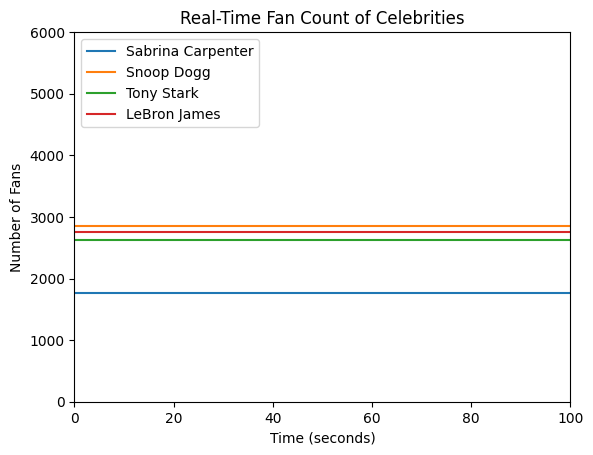

In [43]:



def get_fan_counts():
    # Perform the query to get fan counts grouped by current_favorite
    query = db.session.query(
        UserDynamicPreferences.current_favorite,
        db.func.count(UserDynamicPreferences.current_favorite).label('fan_count')
    ).group_by(UserDynamicPreferences.current_favorite)
    
    # Convert query result to Pandas DataFrame
    result = query.all()
    df = pd.DataFrame(result, columns=['current_favorite', 'fan_count'])
    return df

# Function to display real-time updating line plot
def display_real_time_plot(refresh_interval=5):
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()

    # Initialize the plot
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Number of Fans')
    ax.set_title('Real-Time Fan Count of Celebrities')
    ax.set_ylim(0, 6000)  # Adjust according to expected fan counts
    ax.set_xlim(0, 1000)

    # To track data over time
    time_data = []
    fan_counts_data = {celebrity: [] for celebrity in ['Sabrina Carpenter', 'Snoop Dogg', 'Tony Stark', 'LeBron James']}

    try:
        start_time = time.time()
        while True:
            current_time = time.time() - start_time
            time_data.append(current_time)

            # Fetch the latest fan counts
            df = get_fan_counts()
            for celebrity in fan_counts_data.keys():
                fan_count = df[df['current_favorite'] == celebrity]['fan_count'].sum() if not df[df['current_favorite'] == celebrity].empty else 0
                fan_counts_data[celebrity].append(fan_count)

            clear_output(wait=True)

            ax.clear()
            ax.set_xlabel('Time (seconds)')
            ax.set_ylabel('Number of Fans')
            ax.set_title('Real-Time Fan Count of Celebrities')
            ax.set_ylim(0, 6000)
            ax.set_xlim(0, 100)

            for celebrity, fan_counts in fan_counts_data.items():
                ax.plot(time_data, fan_counts, label=celebrity)
            ax.legend(loc='upper left')
            display(fig)

            plt.pause(0.1)

            time.sleep(refresh_interval)
    except KeyboardInterrupt:
        print("Real-time plot update interrupted.")
    finally:
        plt.ioff()
        plt.show()

# Main script to display real-time plot
if __name__ == '__main__':
    with app.app_context():
        display_real_time_plot(refresh_interval=5)  # Update every 5 seconds


In [ ]:
df.head()